In [28]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, log_loss, hinge_loss, matthews_corrcoef
from sklearn.externals import joblib

%matplotlib inline

# Set the default random seed
np.random.seed(42)

# Load the whole labelled dataset

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plot a sample of the loaded dataset

In [4]:
def plotNum(ind):
    plt.imshow(np.reshape(np.array(data.iloc[ind,1:]), (28, 28)), cmap="gray")

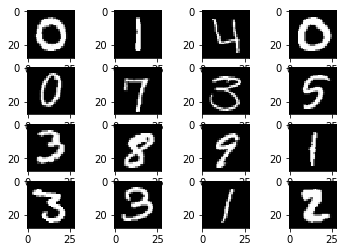

In [5]:
plt.figure()
for ii in range(1,17):
    plt.subplot(4,4,ii)
    plotNum(ii)

# Split the dataset into train/test set

In [6]:
train, test = train_test_split(data, test_size=0.1, stratify=data['label'])

# Sort instances by index

In [7]:
train = train.sort_index()
test = test.sort_index()

# Store the train/test set to disk

In [8]:
train.to_csv("train.csv", index=False, header=True)
test.to_csv("test.csv", index=False, header=True)

# Store the train/test set index to disk

In [9]:
train.index.to_series().to_csv("train.idx", index=False, header=False)
test.index.to_series().to_csv("test.idx", index=False, header=False)

# Model Training

In [10]:
X = train.iloc[:, 1:].values
y = train['label'].values

## Split Train/Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Create the RandomForest classifier

In [12]:
rfc = RandomForestClassifier(n_jobs=-1, max_depth=X_train.shape[1])

## Specify hyperparameters

In [13]:
parameters = {'n_estimators':(10, 50, 100, 500)}

## Run grid search cross-validation

In [14]:
clf = GridSearchCV(rfc, parameters, cv=5, scoring='f1_micro', return_train_score=False, verbose=2)

In [15]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   2.3s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.9s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.4s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.1s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.1s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=784, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': (10, 50, 100, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='f1_micro', verbose=2)

## Print out the results

In [16]:
clf.cv_results_

{'mean_fit_time': array([ 1.15096059,  3.1702642 ,  6.53900704, 28.92352023]),
 'std_fit_time': array([0.52968119, 0.12578547, 0.58106171, 1.46161865]),
 'mean_score_time': array([0.12469282, 0.12286453, 0.12453737, 0.43139076]),
 'std_score_time': array([0.00288402, 0.00110595, 0.00420533, 0.00262654]),
 'param_n_estimators': masked_array(data=[10, 50, 100, 500],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 500}],
 'split0_test_score': array([0.93440185, 0.95654329, 0.9618308 , 0.96463979]),
 'split1_test_score': array([0.92728475, 0.95884978, 0.96099818, 0.96380764]),
 'split2_test_score': array([0.93287037, 0.95717593, 0.96064815, 0.96329365]),
 'split3_test_score': array([0.93531844, 0.95698925, 0.96013234, 0.96195203]),
 'split4_test_score': array([0.92918597, 0.95714758, 0.95880212, 0.9606221 ]),
 'mean_test_score': array([0

# Model Evaluation

## Compute predictions on the held-out portion of the dataset

In [17]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

## Balanced Accuracy

In [18]:
print("Balanced Accuracy: {:.3f}".format(balanced_accuracy_score(y_test, y_pred)))

Balanced Accuracy: 0.964


## F1 score (micro-averaged)

In [19]:
print("F1 score (micro-averaged): {:.3f}".format(f1_score(y_test, y_pred, average='micro')))

F1 score (micro-averaged): 0.965


## F1 score (macro-averaged)

In [20]:
print("F1 score (macro-averaged): {:.3f}".format(f1_score(y_test, y_pred, average='macro')))

F1 score (macro-averaged): 0.964


## Log Loss

In [21]:
print("Log Loss: {:.3f}".format(log_loss(y_test, y_pred_proba)))

Log Loss: 0.295


## Hinge Loss

In [22]:
print("Hinge Loss: {:.3f}".format(hinge_loss(y_test, y_pred_proba)))

Hinge Loss: 0.295


## Matthews Correlation Coefficient

In [23]:
print("Matthews Correlation Coefficient: {:.3f}".format(matthews_corrcoef(y_test, y_pred)))

Matthews Correlation Coefficient: 0.961


## Confusion Matrix

In [24]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[736   0   0   0   0   1   1   0   6   0]
 [  0 830   5   2   1   1   1   1   1   1]
 [  5   2 718   6   6   0   3   6   4   2]
 [  1   0   9 744   1   7   1   9   9   2]
 [  3   3   0   0 715   0   1   2   1   8]
 [  1   0   2   6   1 653   5   2   6   7]
 [  6   0   0   0   3   8 726   0   2   0]
 [  0   4  11   1   4   0   0 761   2   9]
 [  3   4   2   9   2   5   8   0 691   7]
 [  0   3   4   5   6   4   0   8   5 719]]
Normalized confusion matrix
[[0.99 0.   0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.   0.98 0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.95 0.01 0.01 0.   0.   0.01 0.01 0.  ]
 [0.   0.   0.01 0.95 0.   0.01 0.   0.01 0.01 0.  ]
 [0.   0.   0.   0.   0.98 0.   0.   0.   0.   0.01]
 [0.   0.   0.   0.01 0.   0.96 0.01 0.   0.01 0.01]
 [0.01 0.   0.   0.   0.   0.01 0.97 0.   0.   0.  ]
 [0.   0.01 0.01 0.   0.01 0.   0.   0.96 0.   0.01]
 [0.   0.01 0.   0.01 0.   0.01 0.01 0.   0.95 0.01]
 [0.   0.   0.01 0.01 0.

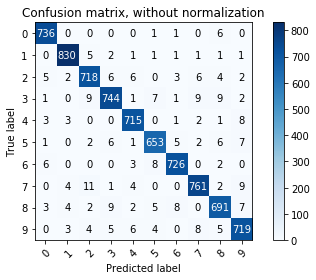

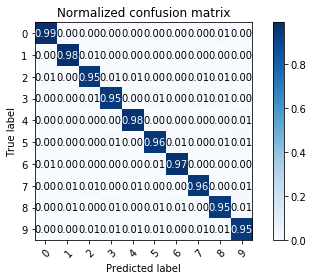

In [25]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
_ = plot_confusion_matrix(y_test, y_pred, classes=range(10),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
_ = plot_confusion_matrix(y_test, y_pred, classes=range(10), normalize=True,
                      title='Normalized confusion matrix')


# Re-fit the best model to the whole training set

In [26]:
clf.best_estimator_.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=784, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Save the best model

In [ ]:
with gzip.GzipFile("RF_best.model.gz", "wb") as outfile:
    joblib.dump(clf.best_estimator_, outfile)